In [52]:
import pandas as pd
import json
import numpy as np
from plotnine import *

In [4]:
with open(f'step_scores.json') as f:
    step_scores = json.load(f)

In [77]:
rand_state_1 = 42
rand_state_2 = 420
score_dict = {}
student_ct = 0
for residency in step_scores.keys():
    step1_scores = []
    step2_scores = []
    for step1 in step_scores[residency].keys():
        step1_range = step1.split('-')
        step1_low = int(step1_range[0])
        for step2 in step_scores[residency][step1].keys():
            score_ct = step_scores[residency][step1][step2]
            step2_range = step2.split('-')
            step2_low = int(step2_range[0])
            step1_scores = list(np.random.RandomState(rand_state_1+student_ct).randint(step1_low,step1_low+10,score_ct))
            step2_scores = list(np.random.RandomState(rand_state_2+student_ct).randint(step2_low,step2_low+10,score_ct))
            for i in range(len(step1_scores)):
                score_dict[student_ct] = {'step1':step1_scores[i],'step2':step2_scores[i],'residency':residency}
                student_ct += 1

In [78]:
step_scores_df = pd.DataFrame.from_dict(score_dict, orient='index')
step_scores_df.head()

,step1,step2,residency
0,266,231,anesthesiology
1,263,238,anesthesiology
2,264,247,anesthesiology
3,263,248,anesthesiology
4,261,248,anesthesiology


In [60]:
step_scores_df.shape

(22278, 3)

In [49]:
step_scores_df.residency.unique()

array(['anesthesiology', 'dermatology', 'EmergencyMedicine',
       'FamilyMedicine', 'InternalMedicine', 'MedicalGenetics',
       'NeurologicalSurgery', 'Neurology', 'NuclearMedicine',
       'ObstetricsGynecology', 'Ophthalmology', 'OrthopaedicSurgery',
       'Otolaryngology', 'PathologySnatomicClinical', 'Pediatrics',
       'PhysicalMedicineRehabilitation', 'PlasticSurgery',
       'PlasticSurgeryIntegrated', 'PreventiveMedicine', 'Psychiatry',
       'RadiationOncology', 'RadiationDiagnostic', 'RadiologyDiagnostic',
       'Surgery', 'ThoracicSurgeryIntegrated',
       'VascularSurgeryIntegrated', 'Urology',
       'InternalMedicinePediatrics'], dtype=object)

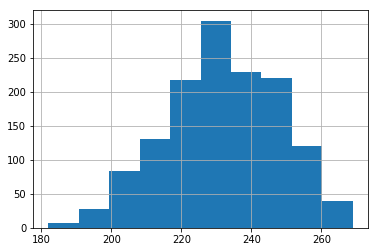

In [79]:
df = step_scores_df.loc[step_scores_df.residency=='anesthesiology','step1']
df.hist()

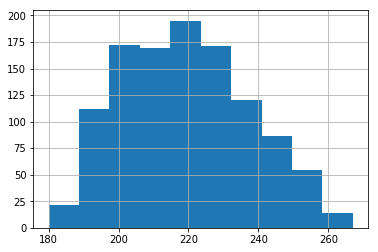

In [80]:
df = step_scores_df.loc[step_scores_df.residency=='Psychiatry','step1']
df.hist()

E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
E:\Anaconda3\envs\curriculum\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
E:\Anaconda3\envs\curriculum\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


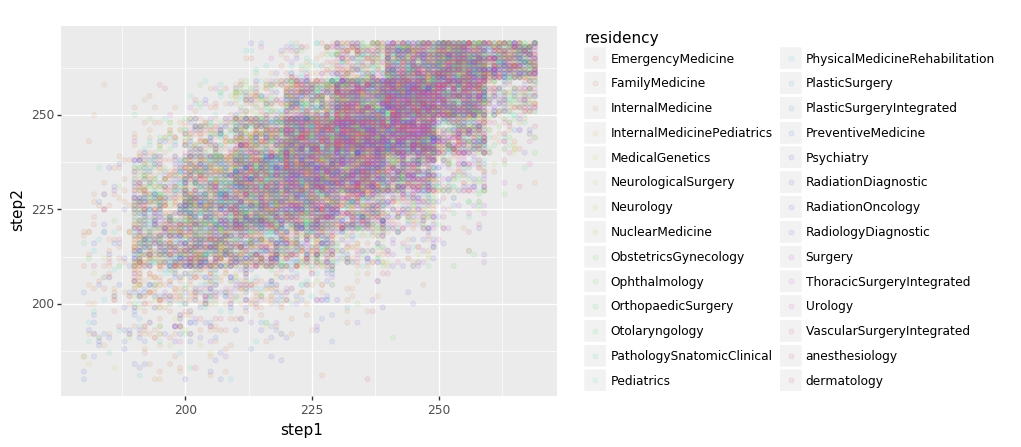

<ggplot: (-9223372036836946172)>

In [81]:
p = ggplot(step_scores_df, aes(x='step1',y='step2',color='residency')) + geom_point(alpha=0.1)
p